In [1]:
!pip install mxnet=="1.4.1"

    100% |████████████████████████████████| 28.4MB 1.8MB/s eta 0:00:011
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install gluonts

  Using cached https://files.pythonhosted.org/packages/04/23/9ab41dbd19dd39bb0ce881cefa3f2a004564cba6888d014a42b2ea57105f/gluonts-0.4.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/52/3f/f6a428599e0d4497e1595030965b5ba455fd8ade6e977e3c819973c4b41d/pandas-0.25.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/0a/bc/fe7d98f0b4b1e72d0c444f343a798461c1f9d8656fb1c335416dbb8b7976/pydantic-0.28-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/bb/62/6f823501b3bf2bac242bd3c320b592ad1516b3081d82c77c1d813f076856/tqdm-4.39.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e1/d2/6f02df2616fd4016075f60157c7a0452b38d8f7938ae94343911e0fb0b09/dataclasses-0.7-py3-none-any.whl
  Found existing installation: pyt

In [52]:
import gluonts
gluonts.__version__

'0.4.1'

In [53]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar


In [54]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_hourly', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_finance', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_finance', 'm4_quarterly_industry', 'm4_quarterly_macro', 'm4_quarterly_micro', 'm4_quarterly_other', 'm4_weekly', 'my_weekly_tm', 'm4_yearly', 'm4_yearly_industry', 'm4_yearly_macro', 'm4_yearly_micro']


#### Note

In SageMaker data are saved into the following folders (example shows m4_weekly):

```
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/train/data.json
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/test/data.json
```

In [55]:
dataname = "m4_monthly_dates"
dataset = get_dataset(dataname, regenerate=False)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_dates.


In [56]:
# get the first time series in the training set
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

# check keys
print(train_entry.keys())
print(test_entry.keys())

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])


In [57]:
train_entry

{'start': Timestamp('1976-06-30 00:00:00', freq='M'),
 'target': array([ 8000.,  8350.,  8570.,  7700.,  7080.,  6520.,  6070.,  6650.,
         6830.,  5710.,  5260.,  5470.,  7870.,  7360.,  8470.,  7880.,
         6750.,  6860.,  6220.,  6650.,  5450.,  5280.,  4970.,  5550.,
         7750.,  7760.,  7190.,  7440.,  6590.,  6210.,  6010.,  6390.,
         5780.,  5700.,  4680.,  4970.,  6850.,  6740.,  7490.,  6250.,
         6900.,  5870.,  5610.,  6310.,  6110.,  6090.,  5810.,  6060.,
         6950.,  7820.,  8270.,  7840.,  7850.,  6710.,  6220.,  7430.,
         6560.,  7080.,  6680.,  6900.,  8680.,  8450.,  8670.,  8470.,
         7910.,  8140.,  7310.,  7860.,  7730.,  7330.,  7430.,  7150.,
         8720.,  8340.,  8840.,  8780.,  8250.,  8180.,  7570.,  9280.,
         9220.,  9140.,  8950.,  8540.,  9360.,  9750.,  9270.,  8690.,
         8200.,  7610.,  7160.,  8280.,  7370.,  7130.,  6840.,  7260.,
         7430.,  7950.,  7790.,  8090.,  7480.,  6700.,  6650.,  6960.,


## Plot Series

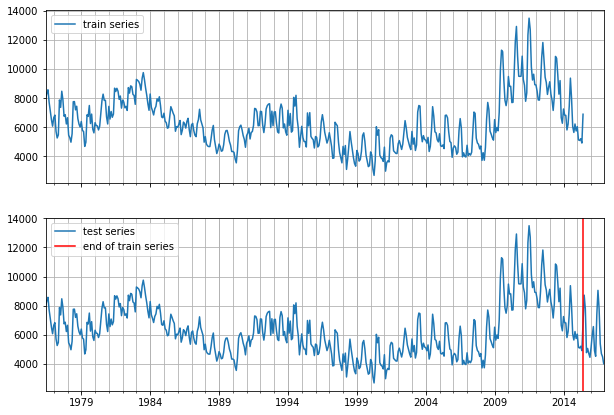

In [58]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [62]:
%%time
results = pd.DataFrame()

for i in range(42, 47):
    print("Seed:", i)
    df = deepar(data="m4_monthly_dates", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_dates.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 50/50 [00:02<00:00, 16.96it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[0] Elapsed time 2.953 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.578251
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.09it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[1] Elapsed time 2.766 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.097146
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.48it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[2] Elapsed time 2.568 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.640077
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.41it/s, avg_epoch_loss=7.53]
INFO:root:Epoch[3] Elapsed time 2.579 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.534474
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.91it/s, avg_epoch_loss=7.52]
INF

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 18.02it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[37] Elapsed time 2.777 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.207512
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:03<00:00, 16.17it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[38] Elapsed time 3.094 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.569350
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 20.20it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[39] Elapsed time 2.480 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.665272
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 20.43it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[40] Elapsed time 2.450 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.898219
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 20.36it/s, avg_epoch_loss=6.67]
INF

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.127304  0.142746  28.027699            0.127655            0.106049   

   seed  epochs  num_batches  
0    42     100           50  
Seed: 43


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 50/50 [00:02<00:00, 17.75it/s, avg_epoch_loss=8.07]
INFO:root:Epoch[0] Elapsed time 2.819 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.065715
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.67it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[1] Elapsed time 2.831 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.278919
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.26it/s, avg_epoch_loss=7.78]
INFO:root:Epoch[2] Elapsed time 2.598 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.775595
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.27it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[3] Elapsed time 2.596 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.641769
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.72it/s, avg_epoch_loss=7.64]
IN

INFO:root:Loading parameters from best epoch (6)
INFO:root:Epoch[37] Learning rate is 0.000125
100%|██████████| 50/50 [00:02<00:00, 19.85it/s, avg_epoch_loss=7.9]
INFO:root:Epoch[37] Elapsed time 2.522 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.901959
INFO:root:Epoch[38] Learning rate is 0.000125
100%|██████████| 50/50 [00:02<00:00, 17.61it/s, avg_epoch_loss=7.99]
INFO:root:Epoch[38] Elapsed time 2.844 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.994815
INFO:root:Epoch[39] Learning rate is 0.000125
100%|██████████| 50/50 [00:02<00:00, 20.15it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[39] Elapsed time 2.484 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.799370
INFO:root:Epoch[40] Learning rate is 0.000125
100%|██████████| 50/50 [00:02<00:00, 19.88it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[40] Elapsed time 2.518 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.233623
INFO:root:Epoch[41] Learning rate is 0.000125
100%|██████████| 50

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.316503  0.151807  33.217159            0.137641            0.124797   

   seed  epochs  num_batches  
0    43     100           50  
Seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 50/50 [00:02<00:00, 17.38it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[0] Elapsed time 2.882 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.592952
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.02it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[1] Elapsed time 2.777 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.101633
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.07it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[2] Elapsed time 2.624 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.692551
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.10it/s, avg_epoch_loss=7.53]
INFO:root:Epoch[3] Elapsed time 2.623 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.530062
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.80it/s, avg_epoch_loss=7.49]
INF

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.43it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[37] Elapsed time 2.576 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.055333
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 18.06it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[38] Elapsed time 2.773 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.555309
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 20.09it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[39] Elapsed time 2.492 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.239318
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.84it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[40] Elapsed time 2.523 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.861532
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.92it/s, avg_epoch_loss=6.89]
IN

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.521737
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:02<00:00, 19.24it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[74] Elapsed time 2.602 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.325300
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 19.92it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[75] Elapsed time 2.514 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.030403
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 19.66it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[76] Elapsed time 2.547 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.752584
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 19.55it/s, avg_epoch_loss=8.04]
INFO:root:Epoch[77] Elapsed time 2.560 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=8.036811
INFO:root:E

      MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.10522  0.140468  22.62567            0.126989            0.097537    44   

   epochs  num_batches  
0     100           50  
Seed: 45


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 50/50 [00:02<00:00, 17.58it/s, avg_epoch_loss=7.37]
INFO:root:Epoch[0] Elapsed time 2.846 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.366172
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.99it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[1] Elapsed time 2.782 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.176765
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.20it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[2] Elapsed time 2.605 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.749048
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.20it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[3] Elapsed time 2.607 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.557020
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.62it/s, avg_epoch_loss=7.66]
IN

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.65it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[37] Elapsed time 2.548 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.179095
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 17.67it/s, avg_epoch_loss=7.47]
INFO:root:Epoch[38] Elapsed time 2.834 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.469419
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.87it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[39] Elapsed time 2.519 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.623714
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 20.04it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[40] Elapsed time 2.499 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.897082
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.94it/s, avg_epoch_loss=6.8]
INFO

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.145141  0.142327  27.456685            0.128403            0.108273   

   seed  epochs  num_batches  
0    45     100           50  
Seed: 46


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 50/50 [00:02<00:00, 17.51it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[0] Elapsed time 2.860 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.265704
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.98it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[1] Elapsed time 2.784 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.178823
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.72it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[2] Elapsed time 2.673 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.630801
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.92it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[3] Elapsed time 2.647 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.504329
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.60it/s, avg_epoch_loss=7.54]
INF

100%|██████████| 50/50 [00:02<00:00, 19.66it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[37] Elapsed time 2.547 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.989189
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 18.00it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[38] Elapsed time 2.781 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.255410
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 19.90it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[39] Elapsed time 2.517 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.230979
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 20.06it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[40] Elapsed time 2.497 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.804941
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 20.06it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[41] Elapsed time 2.495 seconds
INFO:

INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:02<00:00, 18.88it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[74] Elapsed time 2.650 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.104336
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:02<00:00, 19.68it/s, avg_epoch_loss=5.87]
INFO:root:Epoch[75] Elapsed time 2.543 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.874144
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:02<00:00, 19.72it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[76] Elapsed time 2.537 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.681024
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:02<00:00, 19.37it/s, avg_epoch_loss=8.09]
INFO:root:Epoch[77] Elapsed time 2.583 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=8.090268
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████| 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.090729  0.136987  19.932373            0.124253            0.092346   

   seed  epochs  num_batches  
0    46     100           50  
CPU times: user 4h 7min 37s, sys: 16min 26s, total: 4h 24min 3s
Wall time: 2h 12min 13s


In [63]:
!jupyter nbconvert --output-dir="../html_outputs" --to html gluonts11-own-m4_subsets.ipynb

[NbConvertApp] Converting notebook gluonts11-own-m4_subsets.ipynb to html
[NbConvertApp] Writing 516568 bytes to ../html_outputs/gluonts11-own-m4_subsets.html


In [ ]:
%%time
results = pd.DataFrame()

for i in range(47, 52):
    print("Seed:", i)
    df = deepar(data="m4_monthly_dates", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_dates.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Seed: 47


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 50/50 [00:02<00:00, 17.09it/s, avg_epoch_loss=7.76]
INFO:root:Epoch[0] Elapsed time 2.927 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.763352
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.74it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[1] Elapsed time 2.821 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.305529
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.23it/s, avg_epoch_loss=7.77]
INFO:root:Epoch[2] Elapsed time 2.602 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.774664
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.09it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[3] Elapsed time 2.622 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.629117
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.65it/s, avg_epoch_loss=7.65]
IN

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.68it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[37] Elapsed time 2.544 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.163127
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 17.98it/s, avg_epoch_loss=7.47]
INFO:root:Epoch[38] Elapsed time 2.786 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.471414
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.95it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[39] Elapsed time 2.511 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.455716
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 20.01it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[40] Elapsed time 2.502 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.943715
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.53it/s, avg_epoch_loss=6.97]
IN

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.374505
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:02<00:00, 19.05it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[74] Elapsed time 2.628 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.453066
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 20.01it/s, avg_epoch_loss=5.92]
INFO:root:Epoch[75] Elapsed time 2.503 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.915543
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 19.71it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[76] Elapsed time 2.540 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.346176
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 19.29it/s, avg_epoch_loss=8.21]
INFO:root:Epoch[77] Elapsed time 2.595 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=8.211404
INFO:root:E

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.138203  0.14063  22.849187            0.128008            0.100456    47   

   epochs  num_batches  
0     100           50  
Seed: 48


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 50/50 [00:02<00:00, 17.55it/s, avg_epoch_loss=8.32]
INFO:root:Epoch[0] Elapsed time 2.863 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.317547
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.12it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[1] Elapsed time 2.762 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.283796
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.10it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[2] Elapsed time 2.620 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.749041
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.96it/s, avg_epoch_loss=7.53]
INFO:root:Epoch[3] Elapsed time 2.639 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.534142
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.64it/s, avg_epoch_loss=7.6]
INF

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.80it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[37] Elapsed time 2.527 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.244368
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 17.79it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[38] Elapsed time 2.814 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.604321
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.66it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[39] Elapsed time 2.547 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.745437
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 20.12it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[40] Elapsed time 2.487 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.069039
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.87it/s, avg_epoch_loss=6.75]
INF

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.732381
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:02<00:00, 19.36it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[74] Elapsed time 2.586 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.355227
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 19.23it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[75] Elapsed time 2.602 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.286124
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 19.68it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[76] Elapsed time 2.543 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.477255
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 19.45it/s, avg_epoch_loss=7.98]
INFO:root:Epoch[77] Elapsed time 2.574 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.977043
INFO:root:E

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.12935  0.140127  20.190817            0.125991            0.096945    48   

   epochs  num_batches  
0     100           50  
Seed: 49


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 50/50 [00:02<00:00, 17.43it/s, avg_epoch_loss=7.74]
INFO:root:Epoch[0] Elapsed time 2.870 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.742888
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.92it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[1] Elapsed time 2.792 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.157604
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.09it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[2] Elapsed time 2.621 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.624915
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.92it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[3] Elapsed time 2.647 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.456302
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.72it/s, avg_epoch_loss=7.43]
IN

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.73it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[37] Elapsed time 2.538 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.063801
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 17.73it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[38] Elapsed time 2.822 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.417425
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.74it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[39] Elapsed time 2.537 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.603845
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 20.18it/s, avg_epoch_loss=5.88]
INFO:root:Epoch[40] Elapsed time 2.480 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.882398
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.76it/s, avg_epoch_loss=6.67]
INF

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.102851  0.139663  25.39417            0.125934            0.098027    49   

   epochs  num_batches  
0     100           50  
Seed: 50


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 50/50 [00:02<00:00, 16.84it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[0] Elapsed time 2.971 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.524011
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.08it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[1] Elapsed time 2.767 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.187952
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.16it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[2] Elapsed time 2.611 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.717513
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.04it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[3] Elapsed time 2.629 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.561998
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.75it/s, avg_epoch_loss=7.58]
IN

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.47it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[37] Elapsed time 2.571 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.100966
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 18.00it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[38] Elapsed time 2.782 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.501635
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.89it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[39] Elapsed time 2.518 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.568208
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 20.21it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[40] Elapsed time 2.479 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.851941
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 20.15it/s, avg_epoch_loss=6.65]
INFO

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.128246  0.139989  28.643466             0.12659            0.113081   

   seed  epochs  num_batches  
0    50     100           50  
Seed: 51


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 50/50 [00:02<00:00, 17.58it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[0] Elapsed time 2.847 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.459413
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.97it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[1] Elapsed time 2.784 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.144591
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.40it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[2] Elapsed time 2.580 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.614725
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 19.23it/s, avg_epoch_loss=7.53]
INFO:root:Epoch[3] Elapsed time 2.605 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.533883
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.43it/s, avg_epoch_loss=7.62]
IN

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.47it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[37] Elapsed time 2.573 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.106604
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 17.74it/s, avg_epoch_loss=7.47]
INFO:root:Epoch[38] Elapsed time 2.823 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.470345
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.73it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[39] Elapsed time 2.538 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.530733
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 20.03it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[40] Elapsed time 2.500 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.857800
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 19.72it/s, avg_epoch_loss=6.7]
INF

In [ ]:
!jupyter nbconvert --output-dir="../html_outputs" --to html gluonts11-own-m4_subsets.ipynb